In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df = pd.read_excel(r"C:\Users\AKHIL\Downloads\Doctor_fee_consultation\Final Participant Data Folder\Final_train.xlsx")

In [7]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


We have all been in situation where we go to a doctor in emergency and find that the consultation fees are too high. As a data scientist we all should do better. What if you have data that records important details about a doctor and you get to build a model to predict the doctor’s consulting fee.? This is the use case that let's you do that. 

Size of training set: 5961 records

Size of test set: 1987 records



FEATURES:

Qualification: Qualification and degrees held by the doctor

Experience: Experience of the doctor in number of years

Rating: Rating given by patients

Profile: Type of the doctor

Miscellaneous_Info: Extra information about the doctor

Fees: Fees charged by the doctor (Target Variable)

Place: Area and the city where the doctor is located.

In [8]:
df.shape

(5961, 7)

In [10]:
df.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

Rating Column has 3302 null values / 5691

Miscellaneous info has 2620 null values / 5691

For these columns, we need to check whether we can fill those null values.

Place has 25 null values.. since they are less in number and categorical variable, we can fill those with mode.

In [11]:
df.Profile.unique()

array(['Homeopath', 'Ayurveda', 'ENT Specialist', 'Dentist',
       'General Medicine', 'Dermatologists'], dtype=object)

There are 6 profiles of doctors in the data.

In [12]:
df.Qualification[0:10]

0             BHMS, MD - Homeopathy
1      BAMS, MD - Ayurveda Medicine
2    MBBS, MS - Otorhinolaryngology
3               BSc - Zoology, BAMS
4                              BAMS
5                              BAMS
6                              BHMS
7                               BDS
8       MBBS, MD - General Medicine
9                          BSc, BDS
Name: Qualification, dtype: object

As we can see, there are more than one qualification for few doctors.

In [13]:
df.Place[0:10]

0             Kakkanad, Ernakulam
1           Whitefield, Bangalore
2      Mathikere - BEL, Bangalore
3    Bannerghatta Road, Bangalore
4           Keelkattalai, Chennai
5                  Porur, Chennai
6               Karol Bagh, Delhi
7              Arekere, Bangalore
8             Old City, Hyderabad
9               Athani, Ernakulam
Name: Place, dtype: object

Even the place has two values seperated by comma


These are nominal data with no intervals or order

We have to encode them

In [16]:
df.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

All data variables are object type. we need to convert them into numerical data

In [20]:
Q = [df['Qualification']]

In [23]:
Q = []
for i in df.Qualification:
    Q.append(i.split(","))
    

In [25]:
Q[0:5]

[['BHMS', ' MD - Homeopathy'],
 ['BAMS', ' MD - Ayurveda Medicine'],
 ['MBBS', ' MS - Otorhinolaryngology'],
 ['BSc - Zoology', ' BAMS'],
 ['BAMS']]

In [27]:
No_of_Qualifications = []

for i in Q:
    No_of_Qualifications.append(len(i))

In [30]:
No_of_Qualifications[0:10]

[2, 2, 2, 2, 1, 1, 1, 1, 2, 2]

We have converted the Qualifactions to numerical varaible where the values represent ordinal data

We can now delete the Qualifications column. We will delete the unnecessary columns togther later.

In [31]:
E = []
for i in df.Experience:
    E.append(int(i.replace(' years experience','')))

In [33]:
len(E)

5961

In [34]:
len(Q)

5961

Experience column can also be removed.

In [35]:
df.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

In [38]:
df.Place.dtype

dtype('O')

As we know, place has 25 missing values.

In [41]:
len(df.Place.unique())

878

There are 878 unique values.

In [42]:
df.Place.value_counts()

HSR Layout, Bangalore            75
Andheri West, Mumbai             70
Dwarka, Delhi                    67
Banjara Hills, Hyderabad         64
Mulund West, Mumbai              54
                                 ..
Parassala, Thiruvananthapuram     1
Connaught Place, Delhi            1
Rani Khera, Delhi                 1
Satya Niketan, Delhi              1
Kowdiar, Thiruvananthapuram       1
Name: Place, Length: 877, dtype: int64

Hsr layout bangalore tops the list with 75 rows.

877 values in descending order of occurances.

so, the median would be 878/2  = 439

In [51]:
P = pd.DataFrame(df.Place.value_counts())

In [52]:
P.shape

(877, 1)

In [55]:
P[438:439]

,Place
"Kalina, Mumbai",3


Kalina Mumbai is the median for the variable. We can use this to fill null values.

But before that, since we cant split the column bcz of null values and use only the city as variable, lets check for data loss if we remove the 25 missing values.

In [59]:
drop = df.Place.dropna()

In [60]:
drop.shape

(5936,)

In [61]:
(5961-5936)/5961

0.004193927193423922

There is around 0.4 % data loss, and is acceptable

In [62]:
df['No_of_Qualifications'] = No_of_Qualifications
df['Exp'] = E

In [63]:
df.shape

(5961, 9)

In [65]:
df.drop(columns = ['Qualification','Experience'],inplace = True)

Since, we are removing null values of Place, and there will be index changes, we have added our new columns and removed unnecessary coulmns to avoid index problems later

In [73]:
copy = df = df.dropna(axis=0, subset=['Place'])

In [74]:
copy.shape

(5936, 7)

The rows with null values in Place Variable are removed.

In [75]:
copy.isnull().sum()

Rating                  3277
Place                      0
Profile                    0
Miscellaneous_Info      2595
Fees                       0
No_of_Qualifications       0
Exp                        0
dtype: int64

<AxesSubplot:xlabel='No_of_Qualifications', ylabel='Fees'>

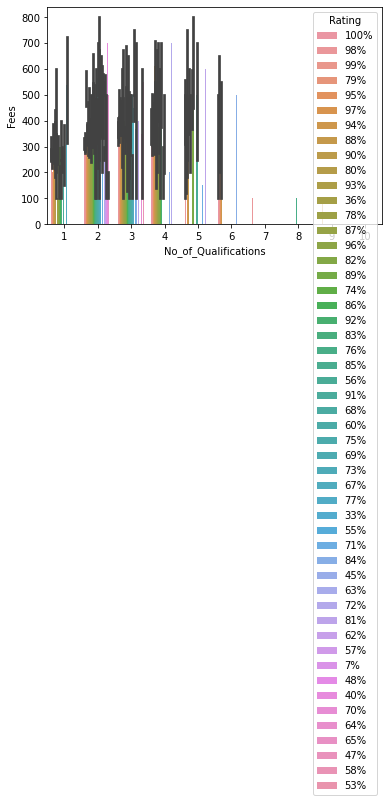

In [79]:
sns.barplot(x= df.No_of_Qualifications, y= df.Fees, hue = df.Rating)

There are many values of ratings, as well as many null values.

In [80]:
df.Rating.notnull().sum()

2659

In [82]:
df.Rating.isnull().sum()

3277

more than 50% of the rows are empty. there fore, filling them could cause a variance / bias or any unknown errors further in the modelling

In [88]:
df.Rating[0].replace('%','')

'100'

In [89]:
df.Rating[3].replace('%','')

AttributeError: 'float' object has no attribute 'replace'

As we can see, nan values doesnt support for using a loop to numerize the data.

In [100]:
R =[]
for i in df.Rating:
    R.append(str(i).replace('%',''))

In [93]:
R

['100',
 '98',
 'nan',
 'nan',
 '100',
 'nan',
 'nan',
 '99',
 'nan',
 'nan',
 'nan',
 'nan',
 '98',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 '79',
 '100',
 '100',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 '100',
 '95',
 'nan',
 '97',
 '97',
 'nan',
 '94',
 '88',
 'nan',
 '100',
 'nan',
 '90',
 '80',
 'nan',
 '100',
 '100',
 '100',
 'nan',
 '99',
 'nan',
 '100',
 'nan',
 '93',
 'nan',
 'nan',
 'nan',
 'nan',
 '100',
 '100',
 '36',
 '100',
 '97',
 'nan',
 '99',
 'nan',
 '99',
 '98',
 'nan',
 'nan',
 '100',
 '100',
 '78',
 'nan',
 '99',
 '93',
 'nan',
 'nan',
 'nan',
 '87',
 '93',
 'nan',
 '98',
 '97',
 'nan',
 'nan',
 'nan',
 'nan',
 '99',
 '100',
 'nan',
 '99',
 'nan',
 '94',
 'nan',
 'nan',
 'nan',
 '100',
 '100',
 '100',
 '97',
 'nan',
 'nan',
 '98',
 'nan',
 '100',
 '99',
 '100',
 '98',
 'nan',
 '90',
 'nan',
 '100',
 'nan',
 'nan',
 '96',
 '90',
 '100',
 '100',
 'nan',
 'nan',
 '95',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 '82',
 'nan',
 '95',
 'nan',
 '100',
 'nan',
 'nan',
 '90',

In [94]:
df['R'] = R

<AxesSubplot:xlabel='R', ylabel='Fees'>

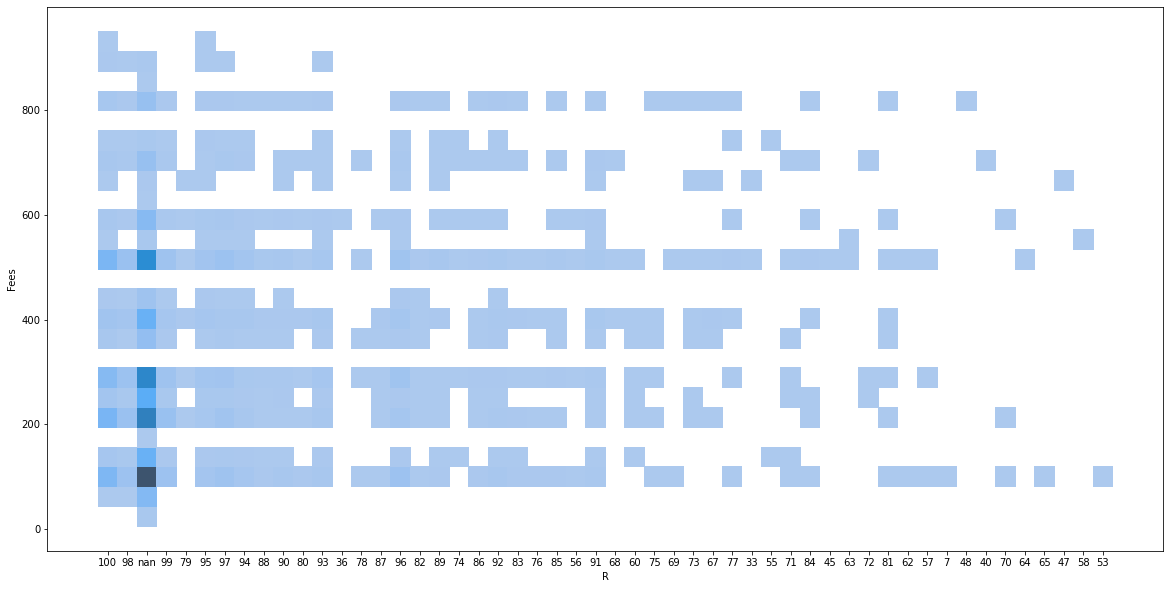

In [98]:
plt.figure(figsize = (20,10))
sns.histplot(x=df['R'],y=df['Fees'],)

C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='R', ylabel='count'>

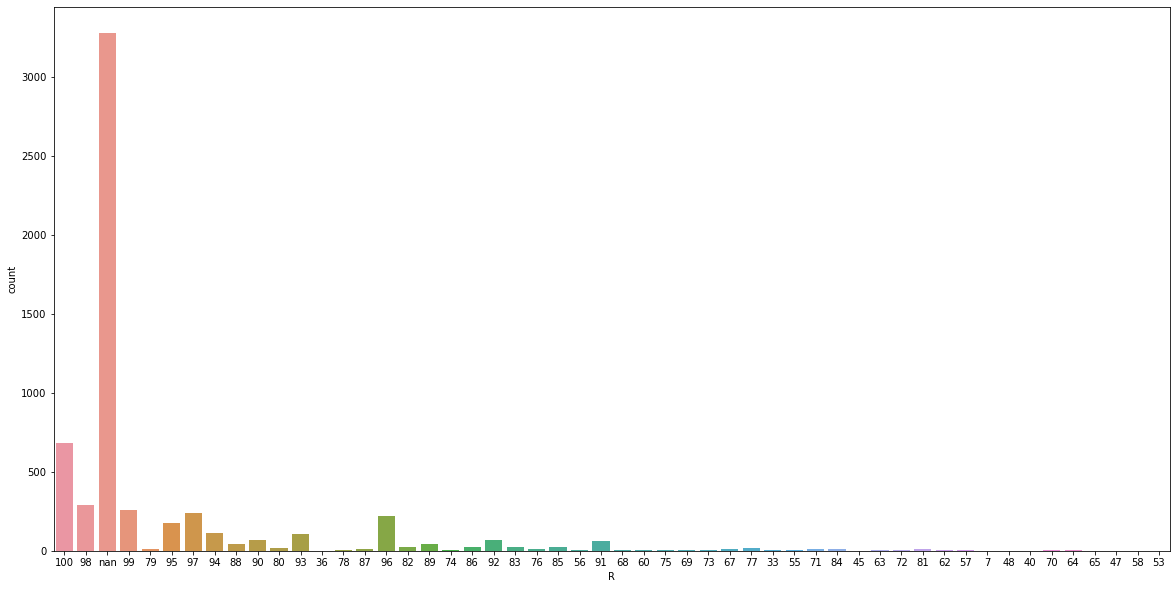

In [102]:
plt.figure(figsize=(20,10))
sns.countplot(df['R'])

Though the variable Rating might have an impact on the fees, we cant fill them with mean as 3000 values will be added. and model will be biased.

Therefore, it is better to remove the column

In [105]:
df.dtypes

Rating                  object
Place                   object
Profile                 object
Miscellaneous_Info      object
Fees                     int64
No_of_Qualifications     int64
Exp                      int64
R                       object
dtype: object

In [106]:
df['Miscellaneous_Info'][0:10]

0                 100% 16 Feedback Kakkanad, Ernakulam
1                98% 76 Feedback Whitefield, Bangalore
2                                                  NaN
3    Bannerghatta Road, Bangalore ₹250 Available on...
4                100% 4 Feedback Keelkattalai, Chennai
5                                                  NaN
6                                                  NaN
7    Dental Fillings Crowns and Bridges Fixing Impa...
8                                                  NaN
9                                                  NaN
Name: Miscellaneous_Info, dtype: object

In [107]:
df['Miscellaneous_Info'].isnull().sum()

2595

Miscellaneouos info is additional information and can be removed.

so we are dropping Rating and Miscellaneous info colums as they have many null values.

In [108]:
copy.drop(columns=['Rating','Miscellaneous_Info','R'],inplace=True)

In [109]:
copy.shape

(5936, 5)

In [110]:
copy.head()

,Place,Profile,Fees,No_of_Qualifications,Exp
0,"Kakkanad, Ernakulam",Homeopath,100,2,24
1,"Whitefield, Bangalore",Ayurveda,350,2,12
2,"Mathikere - BEL, Bangalore",ENT Specialist,300,2,9
3,"Bannerghatta Road, Bangalore",Ayurveda,250,2,12
4,"Keelkattalai, Chennai",Ayurveda,250,1,20


In [119]:
Pa

[['Kakkanad', ' Ernakulam'],
 ['Whitefield', ' Bangalore'],
 ['Mathikere - BEL', ' Bangalore'],
 ['Bannerghatta Road', ' Bangalore'],
 ['Keelkattalai', ' Chennai'],
 ['Porur', ' Chennai'],
 ['Karol Bagh', ' Delhi'],
 ['Arekere', ' Bangalore'],
 ['Old City', ' Hyderabad'],
 ['Athani', ' Ernakulam'],
 ['Thousand Lights', ' Chennai'],
 ['Somajiguda', ' Hyderabad'],
 ['Coimbatore Racecourse', ' Coimbatore'],
 ['Jubilee Hills', ' Hyderabad'],
 ['Kondli', ' Delhi'],
 ['Saroor Nagar', ' Hyderabad'],
 ['Tambaram West', ' Chennai'],
 ['Purasawakkam', ' Chennai'],
 ['KPHB', ' Hyderabad'],
 ['HSR Layout', ' Bangalore'],
 ['Pollachi', ' Coimbatore'],
 ['Vasundhra Enclave', ' Delhi'],
 ['Chembur', ' Mumbai'],
 ['Thammanam', ' Ernakulam'],
 ['Andheri', ' Mumbai'],
 ['Pattom', ' Thiruvananthapuram'],
 ['HSR Layout', ' Bangalore'],
 ['Kukatpally', ' Hyderabad'],
 ['Vadavalli', ' Coimbatore'],
 ['Defence Colony', ' Delhi'],
 ['Banjara Hills', ' Hyderabad'],
 ['Sion West', ' Mumbai'],
 ['CR Park', ' Del

In [120]:
P = []
for i in range(len(Pa)):
    if len(Pa[i]) == 1:
        print(i)



3963


In [123]:
copy.iloc[3962:3964,:]

,Place,Profile,Fees,No_of_Qualifications,Exp
3979,"Kakkanad, Ernakulam",Dentist,100,1,28
3980,e,Dentist,250,1,23


The row with index 3963 in copy has an incomplete place.

In [125]:
data1 = copy.drop(labels=[3980], axis=0)

In [126]:
data1.iloc[3962:3964,:]

,Place,Profile,Fees,No_of_Qualifications,Exp
3979,"Kakkanad, Ernakulam",Dentist,100,1,28
3981,"Malad West, Mumbai",General Medicine,800,2,14


In [129]:
Pa =[]

for i in data1.Place:
    Pa.append(i.split(','))


P = []
for i in range(len(Pa)):
    P.append(Pa[i][1])


In [130]:
len(P)

5935

In [131]:
data1['P'] = P

In [133]:
data1.drop(columns = ['Place'],inplace = True)

In [134]:
data1.describe()

,Fees,No_of_Qualifications,Exp
count,5935.000000,5935.000000,5935.000000
mean,308.821904,1.997810,17.372199
std,190.866108,0.964221,11.112205
min,5.000000,1.000000,0.000000
25%,150.000000,1.000000,9.000000
50%,300.000000,2.000000,15.000000
75%,500.000000,2.000000,23.000000
max,950.000000,10.000000,66.000000


In [135]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5935 entries, 0 to 5960
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Profile               5935 non-null   object
 1   Fees                  5935 non-null   int64 
 2   No_of_Qualifications  5935 non-null   int64 
 3   Exp                   5935 non-null   int64 
 4   P                     5935 non-null   object
dtypes: int64(3), object(2)
memory usage: 278.2+ KB


<AxesSubplot:xlabel='Profile', ylabel='Fees'>

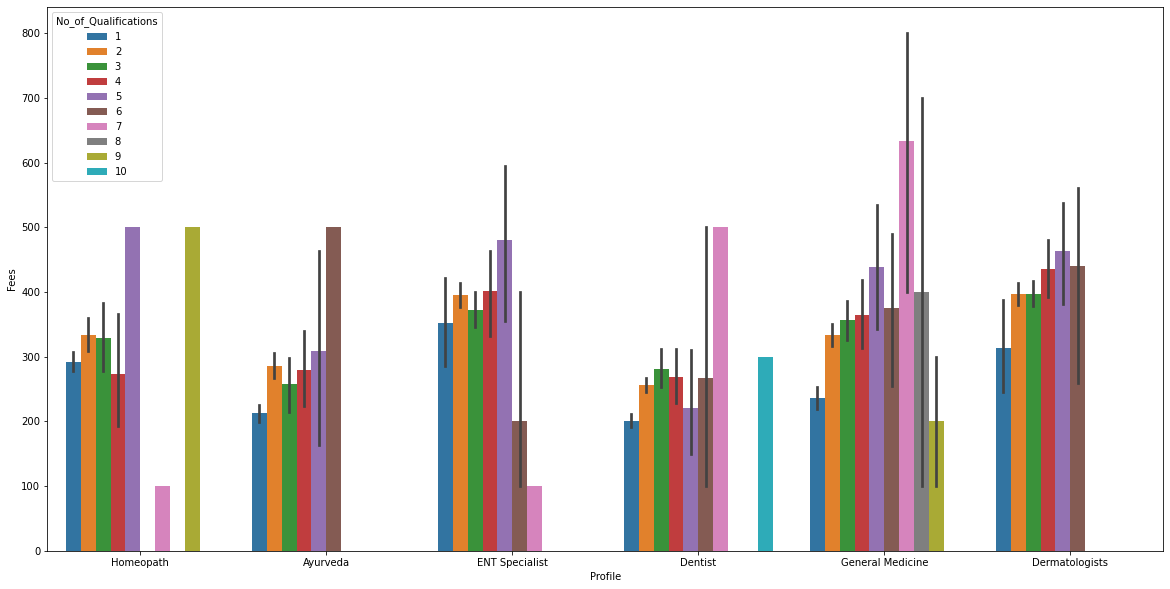

In [137]:
plt.figure(figsize=(20,10))
sns.barplot(x=data1.Profile, y=data1.Fees, hue = data1.No_of_Qualifications)G

The max fees is for General Medicine Profile

<AxesSubplot:xlabel='Fees', ylabel='Exp'>

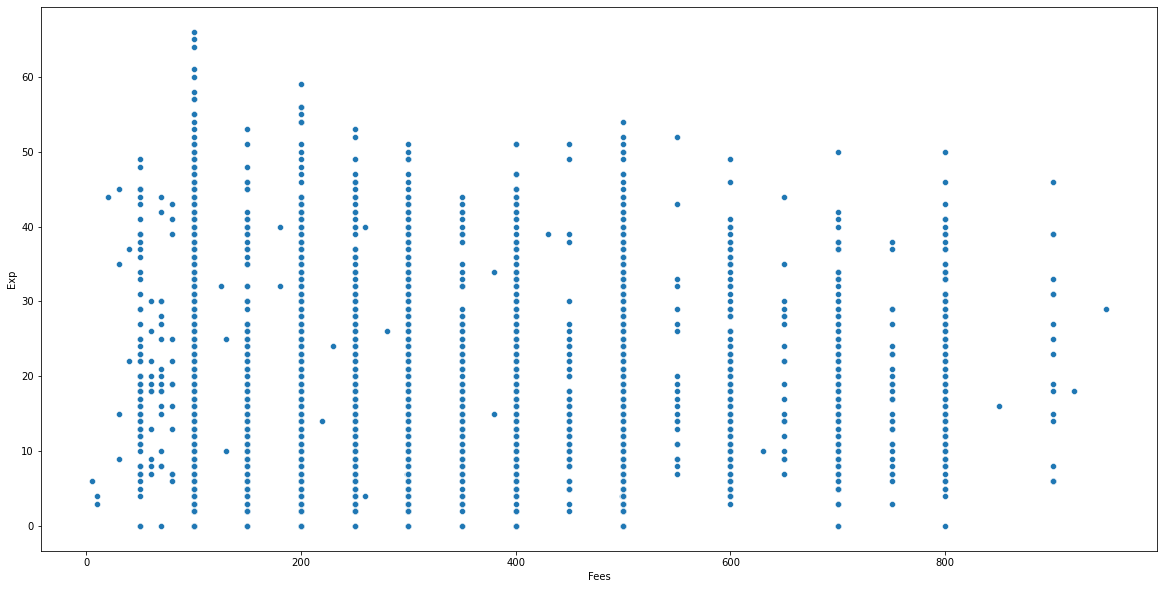

In [145]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=data1.Fees, y=data1.Exp)

In [144]:
df.Exp.max()

66

Based on the scatter plot we can see that there isnt any correlation between fees and experience

<AxesSubplot:xlabel='Fees', ylabel='No_of_Qualifications'>

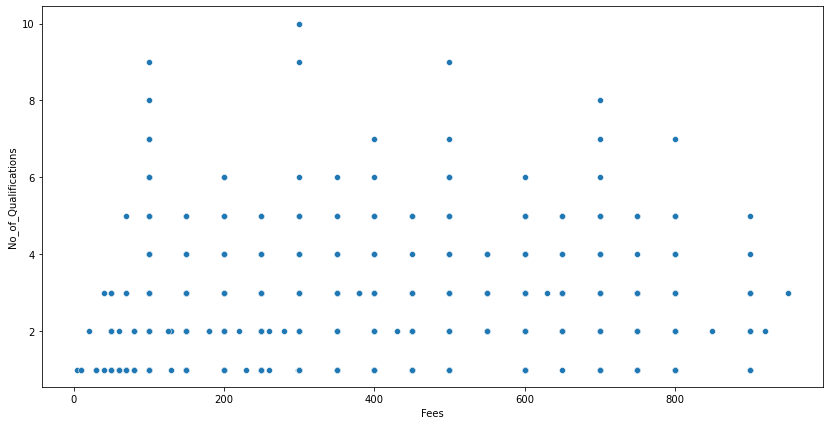

In [146]:
plt.figure(figsize=(14,7))
sns.scatterplot(x=data1.Fees, y=data1.No_of_Qualifications)

There isnt any correlation between no.of qualifications and fees


<AxesSubplot:xlabel='Profile', ylabel='Fees'>

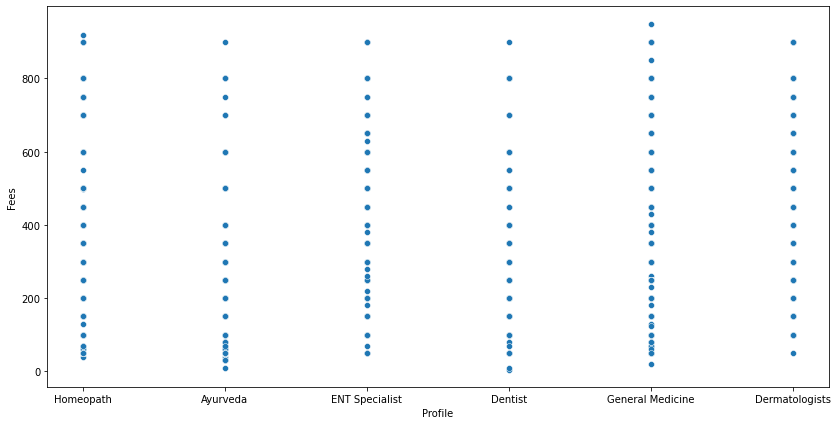

In [152]:
plt.figure(figsize=(14,7))
sns.scatterplot(x=data1.Profile, y=data1.Fees)

In [150]:
df.Fees.max()

950

We havent seent any particular relation between fees and other variables

Lets check for outliers

C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fees'>

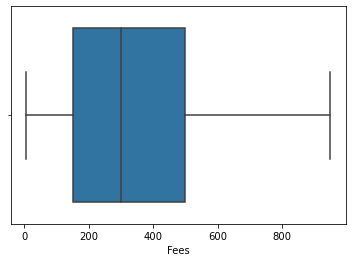

In [153]:
sns.boxplot(df['Fees'])

C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='No_of_Qualifications'>

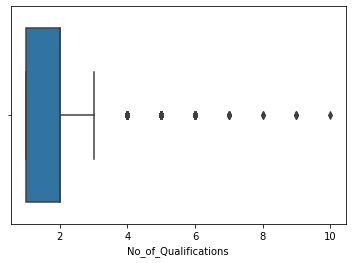

In [154]:
sns.boxplot(df['No_of_Qualifications'])

C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Exp'>

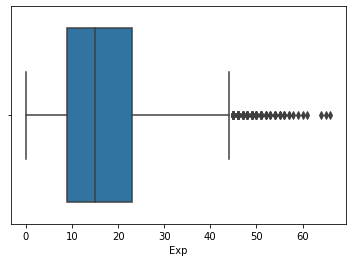

In [155]:
sns.boxplot(df['Exp'])

Exp and No_of_qual has outliers, let us see if we can handle them using log transform for skewness

In [156]:
data1.skew()

Fees                    0.747349
No_of_Qualifications    1.431658
Exp                     1.000495
dtype: float64

In [157]:
np.log(data1.Exp).skew()

C:\Users\AKHIL\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


nan

Since, there are rows with 0 experience, we can use log transform for that

In [158]:
np.log(data1.No_of_Qualifications).skew()

0.09048397559261455

Well, log transform handled the skewness of no.of.qualifications

In [159]:
np.sqrt(data1.Exp).skew()

0.154839250312455

square root transformation handled the skewness of exp column

In [163]:
data1['Q1'] = np.log(data1.No_of_Qualifications)

In [162]:
data1['E'] = np.sqrt(data1.Exp)

In [164]:
data1.shape

(5935, 7)

In [165]:
data1.head()

,Profile,Fees,No_of_Qualifications,Exp,P,E,Q1
0,Homeopath,100,2,24,Ernakulam,4.898979,0.693147
1,Ayurveda,350,2,12,Bangalore,3.464102,0.693147
2,ENT Specialist,300,2,9,Bangalore,3.000000,0.693147
3,Ayurveda,250,2,12,Bangalore,3.464102,0.693147
4,Ayurveda,250,1,20,Chennai,4.472136,0.000000


In [166]:
data1.drop(columns = ['No_of_Qualifications','Exp'],inplace=True)

In [170]:
dp = pd.get_dummies(data1['Profile'])

In [171]:
dpl = pd.get_dummies(data1['P'])

In [173]:
data2 = pd.concat([data1,dp,dpl],axis=1)

In [174]:
data2.shape

(5935, 20)

In [175]:
data2.drop(columns=['Profile','P'],inplace=True)

In [176]:
data2.head()

,Fees,E,Q1,Ayurveda,Dentist,Dermatologists,ENT Specialist,General Medicine,Homeopath,Bangalore,Chennai,Coimbatore,Delhi,Ernakulam,Hyderabad,Mumbai,Sector 5,Thiruvananthapuram
0,100,4.898979,0.693147,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
1,350,3.464102,0.693147,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,300,3.000000,0.693147,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
3,250,3.464102,0.693147,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,250,4.472136,0.000000,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [177]:
from sklearn.preprocessing import StandardScaler

In [178]:
scaler = StandardScaler()

In [179]:
X = data2.drop(columns=['Fees'])
Y = data2.Fees

In [181]:
scaledX = scaler.fit_transform(X)

In [183]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(scaledX,Y,test_size=0.3,random_state=33)

In [184]:
from sklearn.linear_model import LinearRegression

In [185]:
lr = LinearRegression()
lr.fit(xtrain,ytrain)

LinearRegression()

In [187]:
predlr = lr.predict(xtest)

In [188]:
from sklearn.metrics import r2_score, mean_absolute_error

In [189]:
r2_score(ytest,predlr)

0.16616465085665466

The model is working very bad. It may be underfitted.

In [190]:
from sklearn.ensemble import RandomForestRegressor

In [193]:
rfr = RandomForestRegressor()
rfr.fit(xtrain,ytrain)

predrf = rfr.predict(xtest)

print(r2_score(ytest,predrf))

-0.021846268236767052


The model is working very poor and the reason could be the poor correlation between dependent and independent variable.

lets check with cross val score

In [194]:
from sklearn.model_selection import cross_val_score

cross_val_score(lr,xtrain,ytrain,cv=5,scoring='r2').mean()

-3.520446596051208e+25

In [195]:
cross_val_score(rfr,xtrain,ytrain,cv=5,scoring='r2').mean()

-0.01794366022636835

Lets check with regularizing the model

In [196]:
from sklearn.linear_model import Ridge

In [197]:
# test with alpha 1

ridge=Ridge(alpha=1).fit(xtrain,ytrain)

predr = ridge.predict(xtest)

print(r2_score(ytest,predr))

0.16670566863812575


In [198]:
from sklearn.model_selection import GridSearchCV

In [200]:
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)

GCV = GridSearchCV(ridge,param_grid = param_grid, cv=5)

GCV.fit(xtrain,ytrain)

print(r2_score(ytest,GCV.predict(xtest)))

GCV.best_params_

0.16693403607706636


{'alpha': 100}

In [202]:
from sklearn.linear_model import Lasso

lasso=Lasso(alpha=1).fit(xtrain,ytrain)

predl = lasso.predict(xtest)

print(r2_score(ytest,predl))

0.16750403742648612


we see a very minute increase in the accuracy score

In [203]:
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)

GCV = GridSearchCV(lasso,param_grid = param_grid, cv=5)

GCV.fit(xtrain,ytrain)

print(r2_score(ytest,GCV.predict(xtest)))

GCV.best_params_

C:\Users\AKHIL\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4218149.016013309, tolerance: 12087.120768883537
  model = cd_fast.enet_coordinate_descent(
C:\Users\AKHIL\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4251506.124344856, tolerance: 12346.488252542886
  model = cd_fast.enet_coordinate_descent(
C:\Users\AKHIL\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4116796.1642261297, tolerance: 12173.527775865192
  model = cd_fast.enet_coordinate_descent(
C:\Users\AKHIL\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWa

0.16681572833813396


C:\Users\AKHIL\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28142.931143552065, tolerance: 12165.730666626541
  model = cd_fast.enet_coordinate_descent(
C:\Users\AKHIL\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30324.310590609908, tolerance: 12382.006914681111
  model = cd_fast.enet_coordinate_descent(
C:\Users\AKHIL\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36005.075169578195, tolerance: 15289.475109990371
  model = cd_fast.enet_coordinate_descent(


{'alpha': 0.1}

The model is predicting bad as it has fewer independent variables and they are all not correlated

Since, we have a test data set, lets train with all the 5935 rows and predict the values of test data set

In [245]:
df1 = pd.read_excel(r"C:\Users\AKHIL\Downloads\Doctor_fee_consultation\Final Participant Data Folder\Final_test.xlsx")

In [246]:
df1.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


Just as before we need to encode the data before testing

In [247]:
E =[]
for i in df1['Experience']:
    E.append(i.replace(' years experience',''))

In [248]:
df1['E'] = E

In [249]:
len(df1['E'])

1987

In [250]:
df1.drop(columns=['Rating','Miscellaneous_Info'],inplace = True)

In [251]:
Q = []

for i in df1.Qualification:
    Q.append(i.split(','))

In [252]:
Q

[['MBBS'],
 ['MBBS', ' Diploma in Otorhinolaryngology (DLO)'],
 ['MBBS', ' DDVL'],
 ['BAMS'],
 ['BDS', ' MDS - Conservative Dentistry & Endodontics'],
 ['BDS', ' MDS'],
 ['MBBS', ' Diploma in Otorhinolaryngology (DLO)'],
 ['BDS', ' MDS - Pedodontics'],
 ['MD - Ayurveda Medicine',
  ' BAMS',
  ' Yoga Teachers Training Course',
  ' M. D. IN KAYACHIKISTA'],
 ['BHMS'],
 ['BDS'],
 ['MBBS', ' FCD - Diabetology'],
 ['MBBS', ' DDV'],
 ['MBBS', ' MD - Dermatology'],
 ['MS - ENT'],
 ['BDS'],
 ['MBBS', ' MD - Dermatology'],
 ['MBBS',
  ' Diploma in Otorhinolaryngology (DLO)',
  ' MS - ENT',
  ' DNB - ENT',
  ' MNAMS (Membership of the National Academy)'],
 ['BDS', ' MDS - Conservative Dentistry & Endodontics'],
 ['MBBS', ' MD - Dermatology'],
 ['BHMS',
  ' Diploma in Naturopathy & Yogic Science (DNYS)',
  ' Diploma in Diet and Nutrition',
  ' Diploma in Cosmetology'],
 ['BDS'],
 ['MBBS', ' MD - Dermatology'],
 ['MBBS', ' PG Diploma In Clinical Cosmetology (PGDCC)'],
 ['MBBS'],
 ['MBBS', ' Diploma

In [253]:
No_of_Qualifications = []

for i in range(len(Q)):
    No_of_Qualifications.append(len(Q[i]))

In [254]:
No_of_Qualifications[0:5]

[1, 2, 2, 1, 2]

In [255]:
df1['Q'] = No_of_Qualifications

In [256]:
df1.isnull().sum()

Qualification    0
Experience       0
Place            6
Profile          0
E                0
Q                0
dtype: int64

since, there are only 6 values lets fill that using forward fill

In [257]:
df1 = df1.fillna(method='ffill')

In [258]:
df1.isnull().sum()

Qualification    0
Experience       0
Place            0
Profile          0
E                0
Q                0
dtype: int64

The nan are filled by values from the variable.

In [259]:
P =[]
for i in df1['Place']:
    P.append(i.split(','))

In [260]:
pl = []
for i in range(len(P)):
    pl.append(P[i][1])

In [261]:
len(pl)

1987

In [262]:
df1['P'] = pl

In [263]:
df1.head()

,Qualification,Experience,Place,Profile,E,Q,P
0,MBBS,35 years experience,"Ghatkopar East, Mumbai",General Medicine,35,1,Mumbai
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,"West Marredpally, Hyderabad",ENT Specialist,31,2,Hyderabad
2,"MBBS, DDVL",40 years experience,"KK Nagar, Chennai",Dermatologists,40,2,Chennai
3,BAMS,0 years experience,"New Ashok Nagar, Delhi",Ayurveda,0,1,Delhi
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,"Kanakpura Road, Bangalore",Dentist,16,2,Bangalore


In [264]:
Pr = pd.get_dummies(df1['Profile'])

In [265]:
Pr

,Ayurveda,Dentist,Dermatologists,ENT Specialist,General Medicine,Homeopath
0,0,0,0,0,1,0
1,0,0,0,1,0,0
2,0,0,1,0,0,0
3,1,0,0,0,0,0
4,0,1,0,0,0,0
...,...,...,...,...,...,...
1982,1,0,0,0,0,0
1983,0,0,1,0,0,0
1984,0,0,0,0,1,0
1985,0,1,0,0,0,0


In [266]:
df1.drop(columns=['Qualification','Experience','Place','Profile'],inplace = True)

In [268]:
df2 = df1.drop(columns=['P'])

In [269]:
df2 = pd.concat([df2,Pr],axis=1)

In [270]:
df3 = pd.get_dummies(df1['P'])

In [271]:
df2 = pd.concat([df2,df3],axis=1)

In [272]:
df2.head()

,E,Q,Ayurveda,Dentist,Dermatologists,ENT Specialist,General Medicine,Homeopath,Bangalore,Chennai,Coimbatore,Delhi,Ernakulam,Hyderabad,Mumbai,Thiruvananthapuram
0,35,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,31,2,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,40,2,0,0,1,0,0,0,0,1,0,0,0,0,0,0
3,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,16,2,0,1,0,0,0,0,1,0,0,0,0,0,0,0


In [273]:
df2['Q'] = np.log(df2.Q)

In [276]:
intE = []

for i in df2.E:
    intE.append(int(i))

In [278]:
df2['E'] = intE

In [279]:
df2.head()

,E,Q,Ayurveda,Dentist,Dermatologists,ENT Specialist,General Medicine,Homeopath,Bangalore,Chennai,Coimbatore,Delhi,Ernakulam,Hyderabad,Mumbai,Thiruvananthapuram
0,35,0.000000,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,31,0.693147,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,40,0.693147,0,0,1,0,0,0,0,1,0,0,0,0,0,0
3,0,0.000000,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,16,0.693147,0,1,0,0,0,0,1,0,0,0,0,0,0,0


In [280]:
df2['E'] = np.sqrt(df2['E'])

In [281]:
df2.head()

,E,Q,Ayurveda,Dentist,Dermatologists,ENT Specialist,General Medicine,Homeopath,Bangalore,Chennai,Coimbatore,Delhi,Ernakulam,Hyderabad,Mumbai,Thiruvananthapuram
0,5.916080,0.000000,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,5.567764,0.693147,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,6.324555,0.693147,0,0,1,0,0,0,0,1,0,0,0,0,0,0
3,0.000000,0.000000,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,4.000000,0.693147,0,1,0,0,0,0,1,0,0,0,0,0,0,0


The extra test data is also ready

In [282]:
xtrain,xtest,ytrain,ytest = train_test_split(scaledX,Y,train_size=1,random_state=44)

In [284]:
X.columns

Index(['E', 'Q1', 'Ayurveda', 'Dentist', 'Dermatologists', 'ENT Specialist',
       'General Medicine', 'Homeopath', ' Bangalore', ' Chennai',
       ' Coimbatore', ' Delhi', ' Ernakulam', ' Hyderabad', ' Mumbai',
       ' Sector 5', ' Thiruvananthapuram'],
      dtype='object')

In [285]:
df2.columns

Index(['E', 'Q', 'Ayurveda', 'Dentist', 'Dermatologists', 'ENT Specialist',
       'General Medicine', 'Homeopath', ' Bangalore', ' Chennai',
       ' Coimbatore', ' Delhi', ' Ernakulam', ' Hyderabad', ' Mumbai',
       ' Thiruvananthapuram'],
      dtype='object')

A column is missing from test data... that is sector 5 place is not available. so lets add a dummy column of 0.

In [293]:
sector = []
for i in range(len(df2['E'])):
    sector.append(0)
    
df2['Sector 5'] = sector
    

In [294]:
test_data = df2.drop(columns =['Sector 5'])

In [295]:
test_data = pd.concat([test_data,df2['Sector 5']],axis=1)

In [296]:
lr = LinearRegression()
lr.fit(xtrain,ytrain)

predlr = lr.predict(test_data)

In [300]:
scaled_test = scaler.fit_transform(test_data)

In [301]:
lr = LinearRegression()
lr.fit(xtrain,ytrain)

predlr = lr.predict(scaled_test)

In [306]:
len(predlr)

1987

The model predicted all values, but they are not accurate as there was less or no correlation between independent and dependent variables

In [307]:
np.unique(predlr)

array([100.])

As we can see, the model predicts the price as only 100

This is an in accurate model

Lets see, if the previous ridge model we made can predict the values

In [308]:
final_pred = rfr.predict(scaled_test)

In [309]:
np.unique(final_pred)

array([ 67.64220779,  74.5       ,  78.34166667, ..., 705.65      ,
       718.41666667, 725.30833333])

The random forest regressor has predicted some values.

In [310]:
final_pred_ridge = ridge.predict(scaled_test)

In [311]:
np.unique(final_pred_ridge)

array([ 67.82437828,  78.98890868,  80.40466345, ..., 470.00684227,
       473.97814746, 492.93476638])

In [312]:
final_pred_lasso = lasso.predict(scaled_test)

In [313]:
np.unique(final_pred_lasso)

array([ 76.73627167,  85.55838235,  86.67709893, ..., 464.57336478,
       469.70974117, 487.6640877 ])

the highest accuracy we got while training the model is 16.7% for lasso regression. Hence, we finalize the predictions of test data based on lasso regression.

In [317]:
predictions = final_pred_lasso

In [318]:
len(predictions)

1987

In [319]:
predictions[0:5]

array([273.18990218, 352.14177505, 329.27727476, 272.80595178,
       277.49566727])

In [320]:
import pickle
filename = 'Doctorfee'
pickle.dump(lasso,open(filename,'wb'))

# Conclusion

We have encoded the string data type variables and modelled the data.

Since, there was very less or no correlation between Fees and other variables, our model has less accuracy.

The Fees for the test_data is saved in the variable 'predictions'